# Static FC analyses of SUVA dataset

In [1]:
import sys

sys.path.append('/media/miplab-nas2/Data3/Nawal/Tools/StaticFC/')
sys.path.append('/media/miplab-nas2/Data3/Nawal/Tools/Clinical/')
from static_fc import StaticFC
from clinical_analyses import ClinicalAnalyses

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nibabel as nib
import os.path
import json

# Set numpy to print only 2 decimal digits for neatness
np.set_printoptions(precision=2, suppress=True)

%matplotlib inline
%load_ext autoreload
%autoreload 2

## 0. Load configuration & patient data

In [52]:
with open('../config/sFC_config_patients_T3_QC+spicicap_C5toC7.json') as config_file:
    config = json.load(config_file)

In [53]:
patients = ClinicalAnalyses(config)

Creating instance for config patients_T3_QC+spicicap_C5toC7
overwrite_clinical: False


In [54]:
clinical_info = patients.get_patient_info()

Extracting clinical data...
Done!


In [55]:
clinical_info 

,sub,sess,CST_L,CST_R,CST,vol,fm,pinch,mas,age,gender
0,SUVA-TIMES-002,T3,0.000000,37.492105,0.000000,153.0,57,18,1.5,74,1
1,SUVA-TIMES-003,T3,378.224805,0.000000,378.224805,583.0,8,0,8.0,68,1
2,SUVA-TIMES-005,T3,0.000000,0.000000,0.000000,7336.0,60,18,0.0,69,1
3,SUVA-TIMES-006,T3,183.473253,0.000000,183.473253,821.0,60,17,0.0,72,1
4,SUVA-TIMES-007,T3,0.000000,0.000000,0.000000,1449.0,59,18,2.0,87,2
5,SUVA-TIMES-008,T3,268.873440,0.000000,268.873440,305.0,59,10,0.0,40,1
6,SUVA-TIMES-010,T3,0.000000,0.000000,0.000000,621.0,57,18,2.0,70,2
7,SUVA-TIMES-014,T3,0.000000,0.000000,0.000000,3645.0,60,18,3.0,64,1
8,SUVA-TIMES-016,T3,0.000000,8.970100,0.000000,15344.0,59,18,3.0,73,1
9,SUVA-TIMES-021,T3,0.000000,0.000000,0.000000,3020.0,60,18,0.0,73,1


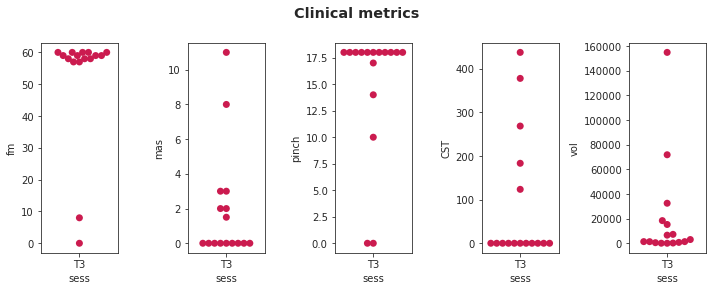

In [184]:
patients.plot_info(clinical_info,['fm','mas','pinch','CST','vol'])

## 1. Prepare FC data

#### 1a. Create instance of StaticFC class for further analyses

In [50]:
sFC = StaticFC(config) 

Creating instance for config patients_T3_QC+spicicap_C5toC7
overwrite_bp: False
overwrite_tc: False
overwrite_corr: True
overwrite_smooth: False
overwrite_alff_maps: False
overwrite_alff_rois: False


#### 1b. Filter data (bandpass in range defined in config file)

In [13]:
sFC.prepare_data()

PREPARE DATA
Filtering data in the range [0.01-0.13] Hz
... Apply filter
Overwrite old files: False
[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done   1 tasks      | elapsed:    9.2s
[Parallel(n_jobs=15)]: Done   2 tasks      | elapsed:    9.2s
[Parallel(n_jobs=15)]: Done   3 tasks      | elapsed:    9.2s
[Parallel(n_jobs=15)]: Done   4 tasks      | elapsed:    9.2s
[Parallel(n_jobs=15)]: Done   5 tasks      | elapsed:    9.2s
[Parallel(n_jobs=15)]: Done   6 tasks      | elapsed:    9.2s
[Parallel(n_jobs=15)]: Done   7 out of  35 | elapsed:    9.2s remaining:   36.7s
[Parallel(n_jobs=15)]: Done   8 out of  35 | elapsed:    9.2s remaining:   31.0s
[Parallel(n_jobs=15)]: Done   9 out of  35 | elapsed:    9.2s remaining:   26.5s
[Parallel(n_jobs=15)]: Done  10 out of  35 | elapsed:    9.2s remaining:   23.0s
[Parallel(n_jobs=15)]: Done  11 out of  35 | elapsed:    9.2s remaining:   20.1s
[Parallel(n_jobs=15)]: Done  12 out of  35 | e

FileNotFoundError: No such file or no access: '/media/miplab-nas2/Data/SpinalCord/3_RestingState/LongRecordings/Cervical/RS_AT/Functional_SCT/RS_Moco_SCT/RS_AT_residuals240vol_noWM.nii.gz'

####  1c. Load timecourses

In [23]:
config['sub_prefix']['H']

'False'

In [38]:
tcs = sFC.extract_tcs()

Timecourses extraction
Overwrite old files: False
Extracting timecourses for subject RS_AT
...Session RS_Moco_SCT
......In C5toC7_VR
......In C5toC7_VL
......In C5toC7_DR
......In C5toC7_DL
Extracting timecourses for subject RS_EP
...Session RS_Moco_SCT
......In C5toC7_VR
......In C5toC7_VL
......In C5toC7_DR
......In C5toC7_DL
Extracting timecourses for subject RS_FB
...Session RS_Moco_SCT
......In C5toC7_VR
......In C5toC7_VL
......In C5toC7_DR
......In C5toC7_DL
Extracting timecourses for subject RS_GB
...Session RS_Moco_SCT
......In C5toC7_VR
......In C5toC7_VL
......In C5toC7_DR
......In C5toC7_DL
Extracting timecourses for subject RS_GP
...Session RS_Moco_SCT
......In C5toC7_VR
......In C5toC7_VL
......In C5toC7_DR
......In C5toC7_DL
Extracting timecourses for subject RS_LJ
...Session RS_Moco_SCT
......In C5toC7_VR
......In C5toC7_VL
......In C5toC7_DR
......In C5toC7_DL
Extracting timecourses for subject RS_MD
...Session RS_Moco_SCT
......In C5toC7_VR
......In C5toC7_VL
......In

### 2. Correlations analyses

#### 2a. Computations

In [45]:
a[1,3]

-0.003673117715108207

In [42]:
a = np.reshape(corrs_df[corrs_df['sess']=='RS_Moco_SCT'].groupby(['roi1','roi2'],sort=False)['rho_Z'].mean().values,(4,4))

ROI-TO-ROI CORRELATION
Overwrite old files: True
...Compute correlations


/media/miplab-nas2/Data3/Nawal/Tools/StaticFC/static_fc.py:239: RuntimeWarning: divide by zero encountered in arctanh
  rhos_Z.append(np.arctanh(np.corrcoef(tcs.loc[(tcs['sub']==sub) & (tcs['sess']==sess) & (tcs['roi']==roi1),'tc'].values, tcs.loc[(tcs['sub']==sub) & (tcs['sess']==sess) & (tcs['roi']==roi2),'tc'].values)[1,0]))


...Compute statistical significance


/home/kinany/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1218: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean


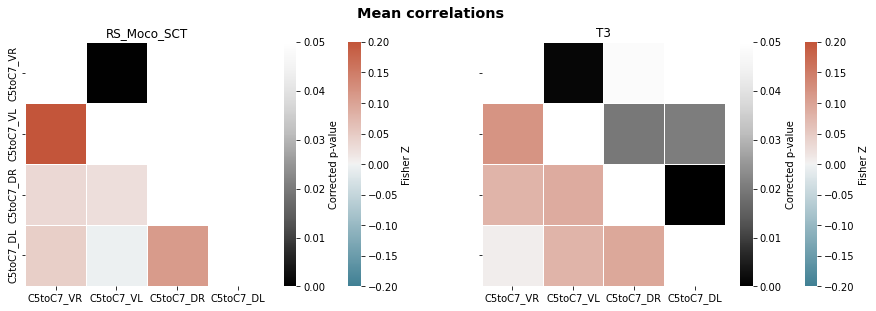

In [51]:
corrs_df,corrs_stats_df = sFC.compute_correlations(tcs=tcs)

#### 2b. Link with functional connectivity
_Note: for the next steps, select corrs_totest(_names) based on config & chosen analyses_

#### Option 1: Interhemispheric FC

_**If using whole cord**_

In [91]:
vv = [corrs_df[(corrs_df['roi1']=='C5toC7_VR') & (corrs_df['roi2']=='C5toC7_VL')]['rho_Z'].values]
dd = [corrs_df[(corrs_df['roi1']=='C5toC7_DR') & (corrs_df['roi2']=='C5toC7_DL')]['rho_Z'].values]
dv_r = [corrs_df[(corrs_df['roi1']=='C5toC7_VR') & (corrs_df['roi2']=='C5toC7_DR')]['rho_Z'].values]    
dv_l = [corrs_df[(corrs_df['roi1']=='C5toC7_VL') & (corrs_df['roi2']=='C5toC7_DL')]['rho_Z'].values]   
corrs_totest = np.transpose(np.concatenate((vv,dd,dv_r,dv_l),axis=0))
corrs_totest_names = ['V-V','D-D','D-V (R)', 'D-V (L)']

_**If using all individual spinal levels**_

In [90]:
c5_vv = [corrs_df[(corrs_df['roi1']=='C5_VR') & (corrs_df['roi2']=='C5_VL')]['rho_Z'].values]
c5_dd = [corrs_df[(corrs_df['roi1']=='C5_DR') & (corrs_df['roi2']=='C5_DL')]['rho_Z'].values]
c6_vv = [corrs_df[(corrs_df['roi1']=='C6_VR') & (corrs_df['roi2']=='C6_VL')]['rho_Z'].values]
c6_dd = [corrs_df[(corrs_df['roi1']=='C6_DR') & (corrs_df['roi2']=='C6_DL')]['rho_Z'].values]
c7_vv = [corrs_df[(corrs_df['roi1']=='C7_VR') & (corrs_df['roi2']=='C7_VL')]['rho_Z'].values]
c7_dd = [corrs_df[(corrs_df['roi1']=='C7_DR') & (corrs_df['roi2']=='C7_DL')]['rho_Z'].values]
corrs_totest = np.transpose(np.concatenate((c5_vv,c5_dd,c6_vv,c6_dd,c7_vv,c7_dd),axis=0))
corrs_totest_names = ['C5 V-V','C5 D-D','C6 V-V','C6 D-D','C7 V-V','C7 D-D']

#### Option 2: Significant FC

_Note: there were 3 significant correlations: **(1)** C5DR-C5VR, **(2)** C6DL-C6DR, **(3)** C6DR-C6VR_

In [129]:
C5DR_C5VR = [corrs_df[(corrs_df['sess']=='T3') & (corrs_df['roi1']=='C5_DR') & (corrs_df['roi2']=='C5_VR')]['rho_Z'].values]
C6DL_C6DR  = [corrs_df[(corrs_df['sess']=='T3') & (corrs_df['roi1']=='C6_DL') & (corrs_df['roi2']=='C6_DR')]['rho_Z'].values]
C6DR_C6VR = [corrs_df[(corrs_df['sess']=='T3') & (corrs_df['roi1']=='C6_DR') & (corrs_df['roi2']=='C6_VR')]['rho_Z'].values]
corrs_totest = np.transpose(np.concatenate((C5DR_C5VR,C6DL_C6DR,C6DR_C6VR),axis=0))
corrs_totest_names = ['C5DR-C5VR','C6DL-C6DR','C6DR-C6VR']

#### ! To run for all options

,tested,clinical,rho,p
0,C5DR-C5VR,fm,0.202672,0.487122
1,C6DL-C6DR,fm,0.154395,0.598186
2,C6DR-C6VR,fm,0.622747,0.017371
3,C5DR-C5VR,mas,-0.295547,0.304945
4,C6DL-C6DR,mas,-0.132183,0.652381
5,C6DR-C6VR,mas,-0.646671,0.012445
6,C5DR-C5VR,pinch,0.138947,0.635693
7,C6DL-C6DR,pinch,0.242876,0.402780
8,C6DR-C6VR,pinch,0.625739,0.016685
9,C5DR-C5VR,CST,0.470597,0.089453


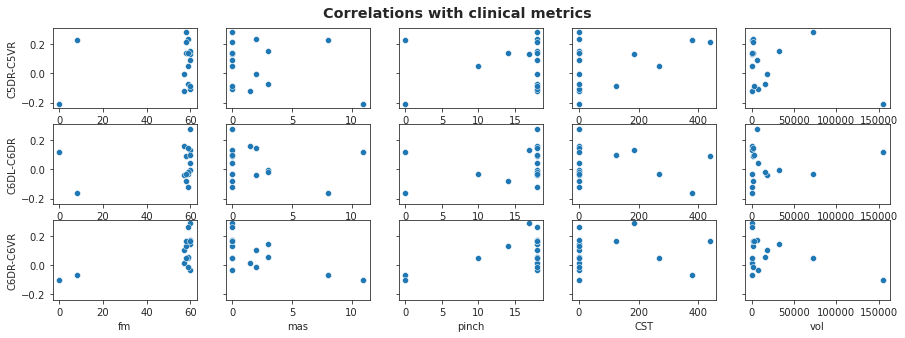

In [130]:
patients.compute_correlations(clinical_data=clinical_info,clinical_names=['fm','mas','pinch','CST','vol'],totest_values=corrs_totest,totest_names=corrs_totest_names)

### 3. ALFF analyses

In [193]:
sFC.compute_alff_maps()

ALFF COMPUTATION
Overwrite old files: True
... Running on data that do not need to be flipped
[Parallel(n_jobs=15)]: Using backend ThreadingBackend with 15 concurrent workers.
220627-15:53:13,913 nipype.interface INFO:
	 stdout 2022-06-27T15:53:13.913215:383.531816 
220627-15:53:14,301 nipype.interface INFO:
	 stdout 2022-06-27T15:53:14.301343:481.369664 
220627-15:53:14,419 nipype.interface INFO:
	 stdout 2022-06-27T15:53:14.419498:436.469431 
220627-15:53:14,425 nipype.interface INFO:
	 stdout 2022-06-27T15:53:14.425234:274.726481 
220627-15:53:14,839 nipype.interface INFO:
	 stdout 2022-06-27T15:53:14.839551:494.201305 
220627-15:53:14,963 nipype.interface INFO:
	 stdout 2022-06-27T15:53:14.963564:458.795688 
220627-15:53:14,964 nipype.interface INFO:
	 stdout 2022-06-27T15:53:14.964463:477.972081 
220627-15:53:14,966 nipype.interface INFO:
	 stdout 2022-06-27T15:53:14.966432:459.387031 
[Parallel(n_jobs=15)]: Done   1 tasks      | elapsed:   14.1s
220627-15:53:15,167 nipype.interfa

220627-15:53:46,635 nipype.interface INFO:
	 stdout 2022-06-27T15:53:46.635301:433.901340 
[Parallel(n_jobs=15)]: Done   2 out of   6 | elapsed:   12.0s remaining:   23.9s
220627-15:53:47,298 nipype.interface INFO:
	 stdout 2022-06-27T15:53:47.298807:304.946903 
220627-15:53:47,484 nipype.interface INFO:
	 stdout 2022-06-27T15:53:47.483809:569.728269 
220627-15:53:47,600 nipype.interface INFO:
	 stdout 2022-06-27T15:53:47.599981:422.951698 
220627-15:53:47,794 nipype.interface INFO:
	 stdout 2022-06-27T15:53:47.794444:551.838230 
[Parallel(n_jobs=15)]: Done   3 out of   6 | elapsed:   13.0s remaining:   13.0s
[Parallel(n_jobs=15)]: Done   4 out of   6 | elapsed:   13.1s remaining:    6.6s
220627-15:53:48,671 nipype.interface INFO:
	 stdout 2022-06-27T15:53:48.671756:749.651728 
220627-15:53:48,897 nipype.interface INFO:
	 stdout 2022-06-27T15:53:48.896876:597.142482 
220627-15:53:49,926 nipype.interface INFO:
	 stdout 2022-06-27T15:53:49.926636:873.252018 
220627-15:53:50,155 nipype.in

ALFF IN ROIS
Overwrite old files: True
Extracting ALFF for subject SUVA-TIMES-002
...Session T3
220628-08:45:00,802 nipype.interface INFO:
	 stdout 2022-06-28T08:45:00.802607:1.144848 
220628-08:45:01,39 nipype.interface INFO:
	 stdout 2022-06-28T08:45:01.039674:1.165515 
220628-08:45:01,319 nipype.interface INFO:
	 stdout 2022-06-28T08:45:01.319124:1.359140 
220628-08:45:01,553 nipype.interface INFO:
	 stdout 2022-06-28T08:45:01.553350:1.319234 
220628-08:45:01,784 nipype.interface INFO:
	 stdout 2022-06-28T08:45:01.783909:0.809106 
220628-08:45:02,16 nipype.interface INFO:
	 stdout 2022-06-28T08:45:02.015941:0.919703 
220628-08:45:02,248 nipype.interface INFO:
	 stdout 2022-06-28T08:45:02.248106:1.056316 
220628-08:45:02,526 nipype.interface INFO:
	 stdout 2022-06-28T08:45:02.525804:1.012545 
220628-08:45:02,757 nipype.interface INFO:
	 stdout 2022-06-28T08:45:02.757542:1.140269 
220628-08:45:02,991 nipype.interface INFO:
	 stdout 2022-06-28T08:45:02.990834:1.188541 
220628-08:45:03,

220628-08:45:22,628 nipype.interface INFO:
	 stdout 2022-06-28T08:45:22.627916:1.768104 
220628-08:45:22,861 nipype.interface INFO:
	 stdout 2022-06-28T08:45:22.861692:1.996285 
220628-08:45:23,94 nipype.interface INFO:
	 stdout 2022-06-28T08:45:23.093935:2.315283 
220628-08:45:23,329 nipype.interface INFO:
	 stdout 2022-06-28T08:45:23.329371:2.185952 
220628-08:45:23,562 nipype.interface INFO:
	 stdout 2022-06-28T08:45:23.562468:2.086656 
220628-08:45:23,796 nipype.interface INFO:
	 stdout 2022-06-28T08:45:23.795984:2.211321 
220628-08:45:24,28 nipype.interface INFO:
	 stdout 2022-06-28T08:45:24.028713:2.138936 
220628-08:45:24,263 nipype.interface INFO:
	 stdout 2022-06-28T08:45:24.263288:2.479556 
220628-08:45:24,497 nipype.interface INFO:
	 stdout 2022-06-28T08:45:24.497278:2.271412 
Extracting ALFF for subject SUVA-TIMES-016
...Session T3
220628-08:45:24,744 nipype.interface INFO:
	 stdout 2022-06-28T08:45:24.744662:1.713811 
220628-08:45:24,979 nipype.interface INFO:
	 stdout 202

220628-08:45:44,964 nipype.interface INFO:
	 stdout 2022-06-28T08:45:44.964498:1.308493 
220628-08:45:45,203 nipype.interface INFO:
	 stdout 2022-06-28T08:45:45.203685:0.909043 
220628-08:45:45,450 nipype.interface INFO:
	 stdout 2022-06-28T08:45:45.450244:0.967943 
220628-08:45:45,811 nipype.interface INFO:
	 stdout 2022-06-28T08:45:45.811502:0.971720 
220628-08:45:46,203 nipype.interface INFO:
	 stdout 2022-06-28T08:45:46.202854:0.991582 
Extracting ALFF for subject SUVA-TIMES-031
...Session T3
220628-08:45:46,606 nipype.interface INFO:
	 stdout 2022-06-28T08:45:46.606512:0.827932 
220628-08:45:46,988 nipype.interface INFO:
	 stdout 2022-06-28T08:45:46.988144:0.797731 
220628-08:45:47,241 nipype.interface INFO:
	 stdout 2022-06-28T08:45:47.241746:0.755831 
220628-08:45:47,487 nipype.interface INFO:
	 stdout 2022-06-28T08:45:47.487199:0.954142 
220628-08:45:47,749 nipype.interface INFO:
	 stdout 2022-06-28T08:45:47.749473:1.087687 
220628-08:45:47,992 nipype.interface INFO:
	 stdout 2

220628-08:46:08,125 nipype.interface INFO:
	 stdout 2022-06-28T08:46:08.125378:1.063442 
Extracting ALFF for subject RS_MD
...Session RS_Moco_SCT
220628-08:46:08,429 nipype.interface INFO:
	 stdout 2022-06-28T08:46:08.429386:1.215958 
220628-08:46:08,684 nipype.interface INFO:
	 stdout 2022-06-28T08:46:08.684015:1.255649 
220628-08:46:08,922 nipype.interface INFO:
	 stdout 2022-06-28T08:46:08.921926:1.100517 
220628-08:46:09,161 nipype.interface INFO:
	 stdout 2022-06-28T08:46:09.161282:0.976270 
220628-08:46:09,398 nipype.interface INFO:
	 stdout 2022-06-28T08:46:09.398609:1.578175 
220628-08:46:09,635 nipype.interface INFO:
	 stdout 2022-06-28T08:46:09.635097:1.475849 
220628-08:46:09,873 nipype.interface INFO:
	 stdout 2022-06-28T08:46:09.873384:1.430472 
220628-08:46:10,110 nipype.interface INFO:
	 stdout 2022-06-28T08:46:10.110077:1.473462 
220628-08:46:10,349 nipype.interface INFO:
	 stdout 2022-06-28T08:46:10.349118:1.841307 
220628-08:46:10,584 nipype.interface INFO:
	 stdout 2

220628-08:46:30,831 nipype.interface INFO:
	 stdout 2022-06-28T08:46:30.831465:1.341211 
220628-08:46:31,72 nipype.interface INFO:
	 stdout 2022-06-28T08:46:31.072033:1.196074 
220628-08:46:31,313 nipype.interface INFO:
	 stdout 2022-06-28T08:46:31.313327:2.246505 
220628-08:46:31,553 nipype.interface INFO:
	 stdout 2022-06-28T08:46:31.553279:2.029113 
220628-08:46:31,795 nipype.interface INFO:
	 stdout 2022-06-28T08:46:31.795348:1.841845 
220628-08:46:32,64 nipype.interface INFO:
	 stdout 2022-06-28T08:46:32.063835:1.903027 
220628-08:46:32,487 nipype.interface INFO:
	 stdout 2022-06-28T08:46:32.487149:1.199256 
220628-08:46:32,871 nipype.interface INFO:
	 stdout 2022-06-28T08:46:32.871206:1.198506 
220628-08:46:33,251 nipype.interface INFO:
	 stdout 2022-06-28T08:46:33.251512:0.983281 
220628-08:46:33,591 nipype.interface INFO:
	 stdout 2022-06-28T08:46:33.591108:1.019877 
Extracting ALFF for subject RS_VG
...Session RS_Moco_SCT
220628-08:46:33,904 nipype.interface INFO:
	 stdout 202

,sub,sess,roi,alff
0,SUVA-TIMES-002,T3,C5_VR,1.144848
1,SUVA-TIMES-002,T3,C5_VL,1.165515
2,SUVA-TIMES-002,T3,C5_DR,1.359140
3,SUVA-TIMES-002,T3,C5_DL,1.319234
4,SUVA-TIMES-002,T3,C6_VR,0.809106
...,...,...,...,...
415,RS_AS,RS_Moco_SCT,C6_DL,2.076718
416,RS_AS,RS_Moco_SCT,C7_VR,1.482304
417,RS_AS,RS_Moco_SCT,C7_VL,1.569826
418,RS_AS,RS_Moco_SCT,C7_DR,1.534015


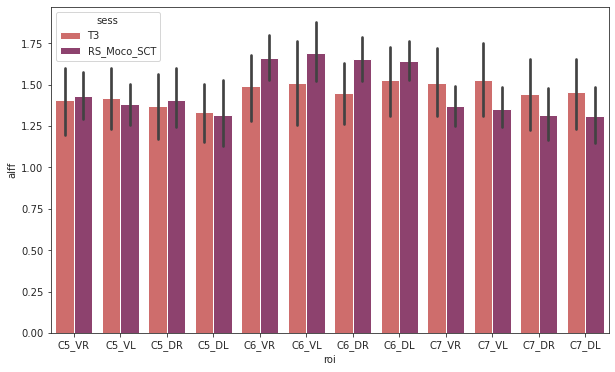

In [209]:
sFC.compute_alff_rois()